In [1]:
import pandas as pd
import numpy as np 
import os
import glob
from pathlib import Path
import re

In [2]:
name_folder = "/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics"

In [18]:
for p in Path(name_folder).glob( '*.csv' ):
    print( p )

In [3]:
files = list( Path(name_folder).rglob( '*.log' ) )
print( files )

[PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics1/0.01perc-12ex-3core-metrics.log'), PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics1/0.01perc-16ex-3core-metrics.log'), PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics1/0.01perc-32ex-2core-metrics.log'), PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics1/0.01perc-8ex-5core-metrics.log'), PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics2/0.02perc-12ex-3core-metrics.log'), PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics2/0.02perc-16ex-3core-metrics.log'), PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics2/0.02perc-32ex-2core-metrics.log'), PosixPath('/mnt/d/desktop/Copernicus/classes/3-semester/bigdata/fractal/all_metrics/metrics2/0.02perc-8e

### Functions

In [61]:
with open(files[2], 'r') as f:
    ff = f.read()

In [3]:
def get_content_log(file):
    import re
    pattern = r"__main__:<module>:\d+"
    content = []
    for line in file.split("\n"):
        if re.search(pattern, line):
            ss = [l for l in line.split("-")]
            content.append(ss[-1])
    return content

def extract_content_log(content):
    dict_content={}
    time_list = []
    for line in content:
        if re.search("Num Executors",line):
            try:
                dict_content['Num Executors'] = int(line.split(':')[-1])
            except Exception as e:
                print(f"Failed to find|  Num Executors: {e}")
        if re.search("Num Cores", line):
            try:
                dict_content['Num Cores'] = int(line.split(':')[-1])
            except Exception as e:
                print(f"Failed to find| Num Cores: {e}")
        if re.search("Executor memory", line):
            try:
                dict_content['Executor Memory'] = line.split(':')[-1]
            except Exception as e:
                print(f"Failed to find| Executor Memory: {e}")
        if re.search("Driver memory", line):
            try:
                dict_content['Driver Memory'] = line.split(':')[-1]
            except Exception as e:
                print(f"Failed to find| Driver Memory: {e}")
        if re.search("Percentage", line):
            try:
                dict_content['Percentage'] = float(line.split(':')[-1])
            except Exception as e:
                print(f"Failed to find| Percentage: {e}")
        if re.search("Val Accuracy", line):
            try:
                dict_content['Val Accuracy'] = float(line.split(':')[-1])
            except Exception as e:
                print(f"Failed to find| Percentage: {e}")
        if re.search("Test Accuracy", line):
            try:
                dict_content['Test Accuracy'] = float(line.split(':')[-1])
            except Exception as e:
                print(f"Failed to find| Percentage: {e}")
        if re.search("TIME", line):
            time_list.append(line.split(':')[1:])

    dict_content['TIME'] = time_list
    dict_time={}
    for l in dict_content['TIME']:
        dict_time[l[0].strip()]= float(l[1])
    dict_content['TIME'] = dict_time
    
    return dict_content
    

### Log 

Loop

In [5]:
files = list( Path( '.' ).glob( '*.log' ) )
print( files )
with open(files[1], 'r') as f:
    ff = f.read()
    
    ## Get content
    content= get_content_log(ff)
    dict_content = extract_content_log(content)
    


[]


IndexError: list index out of range

In [6]:
dict_content

NameError: name 'dict_content' is not defined

In [167]:
time_dict = dict_content.pop("TIME")                   # remove TIME key and get its contents
for key, value in time_dict.items():
    dict_content[f"TIME_{key}"] = value

dict_content

{'Num Executors': 8,
 'Num Cores': 2,
 'Executor Memory': ' 2g',
 'Driver Memory': ' 2g',
 'Percentage': 0.001,
 'TIME_Feature Engineering': 0.6619,
 'TIME_Pipeline Fit': 179.60088,
 'TIME_Validation': 0.06247,
 'TIME_Test': 0.0917,
 'TIME_Final Time': 240.79531}

In [168]:
# List of files with log
files = list( Path( '.' ).glob( '*.log' ) )

global_dict = {}
## Loop to extract important values
for file in files:
    with open(file, 'r') as f:
        ff = f.read()
    
    ## Get content
    content= get_content_log(ff)
    dict_content = extract_content_log(content)
    
    ## Fix time
    time_dict = dict_content.pop("TIME")                
    for key, value in time_dict.items():
        dict_content[f"TIME_{key}"] = value
        
    ## global dict
    global_dict[file.name.split('.')[0]] = dict_content

In [169]:
global_dict.keys()

dict_keys(['13-11-_09h-47min-4ex-metrics', '13-11-_09h-51min-8ex-metrics', '13-11-_09h-56min-4ex-metrics'])

In [170]:
global_dict['13-11-_09h-47min-4ex-metrics']

{'Num Executors': 4,
 'Num Cores': 2,
 'Executor Memory': ' 2g',
 'Driver Memory': ' 2g',
 'Percentage': 0.001,
 'TIME_Feature Engineering': 0.7048,
 'TIME_Pipeline Fit': 177.17193,
 'TIME_Validation': 0.08655,
 'TIME_Test': 0.05955,
 'TIME_Final Time': 232.10288}

## CSV

In [158]:
files = list( Path( '.' ).glob( '*.csv' ) )

dict_df={}
for file in files:
    fcsv = pd.read_csv(file)
    
    ## add name of the file
    fcsv['name_file_csv'] = file.name
    
    dict_df[file.name.split('.')[0]] = fcsv
        
        

## Big loop


In [8]:
global_dict.keys()

dict_keys(['0.01perc-12ex-3core-metrics', '0.01perc-16ex-3core-metrics', '0.01perc-32ex-2core-metrics', '0.01perc-8ex-5core-metrics', '0.02perc-12ex-3core-metrics', '0.02perc-16ex-3core-metrics', '0.02perc-32ex-2core-metrics', '0.02perc-8ex-5core-metrics', '0.05perc-12ex-3core-metrics', '0.05perc-16ex-3core-metrics', '0.05perc-32ex-2core-metrics', '0.05perc-8ex-5core-metrics'])

In [4]:
# List of files with log
files_log = list( Path(name_folder).rglob( '*.log' ) )
files_csv = list( Path(name_folder).rglob( '*.csv' ) )

global_dict = {}
## Loop to extract important values
for file in files_log:
    with open(file, 'r') as f:
        ff = f.read()
    
    ## Get content
    content= get_content_log(ff)
    dict_content = extract_content_log(content)
    
    ## Fix time
    time_dict = dict_content.pop("TIME")                
    for key, value in time_dict.items():
        dict_content[f"TIME_{key}"] = value
        
    ## global dict
    global_dict[file.stem] = dict_content

print(f"Log files done! Found {len(global_dict)} log files")
## csv
dict_df={}
for file in files_csv:
    fcsv = pd.read_csv(file)
    
    ## add name of the file
    fcsv['name_file_csv'] = file.stem
    
    dict_df[file.stem] = fcsv
print(f"Csv files done! Found {len(dict_df.keys())} csv files")

Log files done! Found 12 log files
Csv files done! Found 12 csv files


In [5]:
## add global_dict from logger to this df

## read from the key of each dataframe, check if they match
## add for each dataframe the values inside the dict
global_list_df = []
for log, csv in zip(global_dict.keys(), dict_df.keys()):
    print('Running pairs of:')
    print(f"{log}|{csv}")
    new_df = dict_df[csv].copy()
    print(f"Shape of the df before the dict with log:{new_df.shape}")
    for key,value in global_dict[log].items():
        ## add each key into the df
        new_df[key] = value
    new_df['name_file_log'] = log
    print(f"Shape of the df AFTER the dict with log:{new_df.shape}")
    print(f"-"*30)
    global_list_df.append(new_df)

Running pairs of:
0.01perc-12ex-3core-metrics|0.01perc-12ex-3core-metrics-stagemetrics
Shape of the df before the dict with log:(1, 31)
Shape of the df AFTER the dict with log:(1, 46)
------------------------------
Running pairs of:
0.01perc-16ex-3core-metrics|0.01perc-16ex-3core-metrics-stagemetrics
Shape of the df before the dict with log:(1, 31)
Shape of the df AFTER the dict with log:(1, 46)
------------------------------
Running pairs of:
0.01perc-32ex-2core-metrics|0.01perc-32ex-2core-metrics-stagemetrics
Shape of the df before the dict with log:(1, 31)
Shape of the df AFTER the dict with log:(1, 46)
------------------------------
Running pairs of:
0.01perc-8ex-5core-metrics|0.01perc-8ex-5core-metrics-stagemetrics
Shape of the df before the dict with log:(1, 31)
Shape of the df AFTER the dict with log:(1, 46)
------------------------------
Running pairs of:
0.02perc-12ex-3core-metrics|0.02perc-12ex-3core-metrics-stagemetrics
Shape of the df before the dict with log:(1, 31)
Shape 

### Aggregate df

In [6]:
dff = pd.concat(global_list_df, axis=0)

In [7]:
dff.reset_index(inplace=True)
dff.drop(columns=['index'])

,numStages,numTasks,elapsedTime,stageDuration,executorRunTime,executorCpuTime,executorDeserializeTime,executorDeserializeCpuTime,resultSerializationTime,jvmGCTime,...,Val Accuracy,Test Accuracy,TIME_Feature Engineering,TIME_Count Rows,TIME_Pipeline Fit,TIME_Validation,TIME_Test,TIME_Final Time,TIME_Final Time supressed count rows,name_file_log
0,48,3335,296643,289227,9282026,7207487,121688,37524,396,360945,...,0.875237,0.877,0.6818,3.09804,167.06423,0.08612,0.06167,299.44648,296.34843,0.01perc-12ex-3core-metrics
1,48,3335,268609,261312,8983813,7074616,125643,37704,441,330407,...,0.873052,0.877,0.6586,3.28351,156.16618,0.08090,0.06606,271.47372,268.19021,0.01perc-16ex-3core-metrics
2,48,2877,536296,528835,8718133,6073182,67491,34830,260,280352,...,0.875688,0.877,0.6808,4.48412,451.13614,0.09067,0.05870,539.10790,534.62377,0.01perc-32ex-2core-metrics
3,48,3684,380723,373081,11026042,8109492,174331,40532,1155,372910,...,0.874356,0.877,0.6820,3.37994,252.83235,0.05999,0.05649,383.52967,380.14974,0.01perc-8ex-5core-metrics
4,48,5959,477071,469286,18588378,14815408,141719,54983,624,778684,...,0.864091,0.878,0.6757,3.27705,374.43311,0.08213,0.05995,480.34087,477.06381,0.02perc-12ex-3core-metrics
5,48,5959,444616,436836,18862433,14696609,140219,54853,755,720724,...,0.864871,0.878,0.7639,3.30547,343.54546,0.08552,0.06133,447.90530,444.59984,0.02perc-16ex-3core-metrics
6,48,5679,595424,587680,13937840,12404914,91584,49034,272,478878,...,0.865266,0.877,0.7218,5.12102,490.85151,0.06384,0.06314,598.49742,593.37640,0.02perc-32ex-2core-metrics
7,48,6460,435456,427685,26961902,13937629,231097,58930,2191,1336045,...,0.863933,0.878,0.6636,3.51257,335.67182,0.08374,0.05819,438.63118,435.11861,0.02perc-8ex-5core-metrics
8,48,16244,725884,717200,44033008,35814968,201669,115328,1229,2010460,...,0.871552,0.876,0.6861,3.84800,656.82381,0.08762,0.05731,729.94088,726.09288,0.05perc-12ex-3core-metrics
9,48,16244,862112,853394,45329145,36742678,204298,116686,960,2180150,...,0.872120,0.877,0.6891,3.91823,694.08252,0.07667,0.05519,866.29651,862.37828,0.05perc-16ex-3core-metrics


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## Plots

In [20]:
dff.to_csv("results.csv")

In [9]:
dff

,index,numStages,numTasks,elapsedTime,stageDuration,executorRunTime,executorCpuTime,executorDeserializeTime,executorDeserializeCpuTime,resultSerializationTime,...,Val Accuracy,Test Accuracy,TIME_Feature Engineering,TIME_Count Rows,TIME_Pipeline Fit,TIME_Validation,TIME_Test,TIME_Final Time,TIME_Final Time supressed count rows,name_file_log
0,0,48,3335,296643,289227,9282026,7207487,121688,37524,396,...,0.875237,0.877,0.6818,3.09804,167.06423,0.08612,0.06167,299.44648,296.34843,0.01perc-12ex-3core-metrics
1,0,48,3335,268609,261312,8983813,7074616,125643,37704,441,...,0.873052,0.877,0.6586,3.28351,156.16618,0.08090,0.06606,271.47372,268.19021,0.01perc-16ex-3core-metrics
2,0,48,2877,536296,528835,8718133,6073182,67491,34830,260,...,0.875688,0.877,0.6808,4.48412,451.13614,0.09067,0.05870,539.10790,534.62377,0.01perc-32ex-2core-metrics
3,0,48,3684,380723,373081,11026042,8109492,174331,40532,1155,...,0.874356,0.877,0.6820,3.37994,252.83235,0.05999,0.05649,383.52967,380.14974,0.01perc-8ex-5core-metrics
4,0,48,5959,477071,469286,18588378,14815408,141719,54983,624,...,0.864091,0.878,0.6757,3.27705,374.43311,0.08213,0.05995,480.34087,477.06381,0.02perc-12ex-3core-metrics
5,0,48,5959,444616,436836,18862433,14696609,140219,54853,755,...,0.864871,0.878,0.7639,3.30547,343.54546,0.08552,0.06133,447.90530,444.59984,0.02perc-16ex-3core-metrics
6,0,48,5679,595424,587680,13937840,12404914,91584,49034,272,...,0.865266,0.877,0.7218,5.12102,490.85151,0.06384,0.06314,598.49742,593.37640,0.02perc-32ex-2core-metrics
7,0,48,6460,435456,427685,26961902,13937629,231097,58930,2191,...,0.863933,0.878,0.6636,3.51257,335.67182,0.08374,0.05819,438.63118,435.11861,0.02perc-8ex-5core-metrics
8,0,48,16244,725884,717200,44033008,35814968,201669,115328,1229,...,0.871552,0.876,0.6861,3.84800,656.82381,0.08762,0.05731,729.94088,726.09288,0.05perc-12ex-3core-metrics
9,0,48,16244,862112,853394,45329145,36742678,204298,116686,960,...,0.872120,0.877,0.6891,3.91823,694.08252,0.07667,0.05519,866.29651,862.37828,0.05perc-16ex-3core-metrics


<Axes: xlabel='Num Executors', ylabel='TIME_Final Time'>

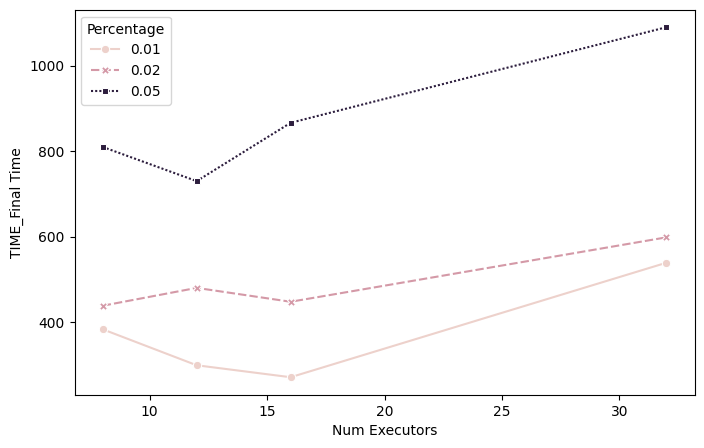

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
sns.lineplot(data= dff.sort_values(by='Num Executors'), x='Num Executors', y='TIME_Final Time',
                hue='Percentage',
                style='Percentage',
                markers=True,
                ax=ax)
# sns.lineplot(data=dff.sort_values(by='Num Executors'), x='Num Executors', y='Num Cores',
#              hue='Percentage',style='Percentage',markers=True,ax=ax)

-- add plots

-- nodes per times

-- 

In [14]:
np.linspace(0,0.5,6)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

/tmp/ipykernel_41005/3133818487.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


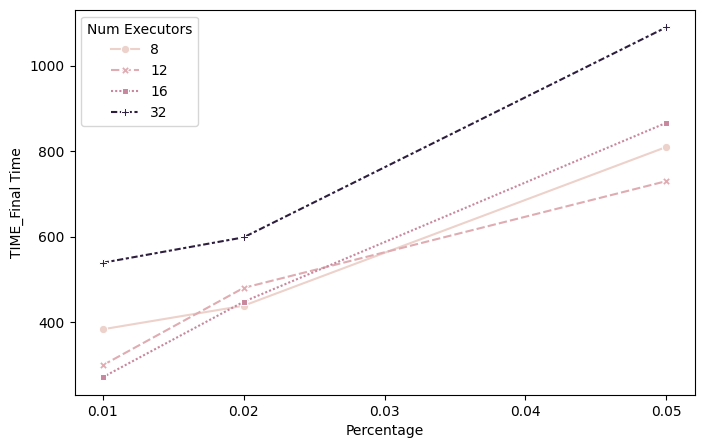

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
sns.lineplot(data= dff.sort_values(by='Num Executors'), x='Percentage', y='TIME_Final Time',
                hue='Num Executors',
                style='Num Executors',
                markers=True,
                ax=ax)
ax.set_xticks(np.linspace(0.01,0.05,5))
fig.show()

In [46]:
dff.columns

Index(['index', 'numStages', 'numTasks', 'elapsedTime', 'stageDuration',
       'executorRunTime', 'executorCpuTime', 'executorDeserializeTime',
       'executorDeserializeCpuTime', 'resultSerializationTime', 'jvmGCTime',
       'shuffleFetchWaitTime', 'shuffleWriteTime', 'resultSize',
       'diskBytesSpilled', 'memoryBytesSpilled', 'peakExecutionMemory',
       'recordsRead', 'bytesRead', 'recordsWritten', 'bytesWritten',
       'shuffleRecordsRead', 'shuffleTotalBlocksFetched',
       'shuffleLocalBlocksFetched', 'shuffleRemoteBlocksFetched',
       'shuffleTotalBytesRead', 'shuffleLocalBytesRead',
       'shuffleRemoteBytesRead', 'shuffleRemoteBytesReadToDisk',
       'shuffleBytesWritten', 'shuffleRecordsWritten', 'name_file_csv',
       'Num Executors', 'Num Cores', 'Executor Memory', 'Driver Memory',
       'Percentage', 'Val Accuracy', 'Test Accuracy',
       'TIME_Feature Engineering', 'TIME_Count Rows', 'TIME_Pipeline Fit',
       'TIME_Validation', 'TIME_Test', 'TIME_Final T

In [21]:
cols_name = ['name_file_csv',
       'Num Executors', 'Num Cores',
       'Percentage', 'Val Accuracy', 'Test Accuracy',
       'TIME_Feature Engineering', 'TIME_Count Rows', 'TIME_Pipeline Fit',
       'TIME_Validation', 'TIME_Test', 'TIME_Final Time',
       'TIME_Final Time supressed count rows']

dff_melted = dff[cols_name].melt(id_vars=['name_file_csv',
                            'Num Executors', 'Num Cores',
                            'Percentage', 'Val Accuracy', 'Test Accuracy'],
                    var_name='Time')


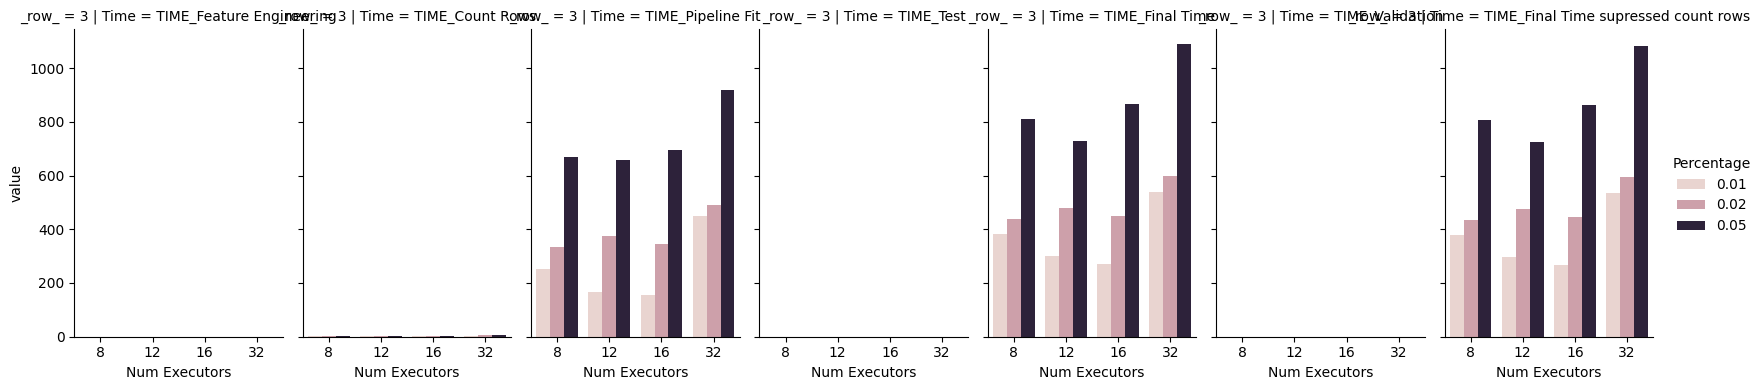

In [22]:

g = sns.catplot(
    data=dff_melted.sort_values(by='Num Executors'),
    x="Num Executors", y="value",hue='Percentage',
    col="Time",
    row=3,
    kind="bar", height=4, aspect=.6,
)
# g.set_axis_labels("", "Survival Rate")
# g.set_xticklabels(["Men", "Women", "Children"])
# g.set_titles("{col_name} {col_var}")
# g.set(ylim=(0, 1))
# g.despine(left=True)

## Final Plots

In [98]:
dff = pd.read_csv('results.csv')

In [99]:
dff['Total Cores'] = dff['Num Executors']*dff['Num Cores']
dff['CPU Utilization'] = dff['executorCpuTime'] / dff['executorRunTime']
dff['Parallelism Efficiency'] = (dff['executorRunTime']/1000) / (dff['numTasks']*dff['elapsedTime']/1000)

dff['Sampling'] = dff['Percentage'].apply(lambda x: f"{x:.0%}")
dff['Executor Run Time (s)'] = dff['executorRunTime']/1000
dff['Num Tasks * Elapsed Time'] = dff['numTasks']*(dff['elapsedTime']/1000)

In [100]:
dff.columns

Index(['Unnamed: 0', 'index', 'numStages', 'numTasks', 'elapsedTime',
       'stageDuration', 'executorRunTime', 'executorCpuTime',
       'executorDeserializeTime', 'executorDeserializeCpuTime',
       'resultSerializationTime', 'jvmGCTime', 'shuffleFetchWaitTime',
       'shuffleWriteTime', 'resultSize', 'diskBytesSpilled',
       'memoryBytesSpilled', 'peakExecutionMemory', 'recordsRead', 'bytesRead',
       'recordsWritten', 'bytesWritten', 'shuffleRecordsRead',
       'shuffleTotalBlocksFetched', 'shuffleLocalBlocksFetched',
       'shuffleRemoteBlocksFetched', 'shuffleTotalBytesRead',
       'shuffleLocalBytesRead', 'shuffleRemoteBytesRead',
       'shuffleRemoteBytesReadToDisk', 'shuffleBytesWritten',
       'shuffleRecordsWritten', 'name_file_csv', 'Num Executors', 'Num Cores',
       'Executor Memory', 'Driver Memory', 'Percentage', 'Val Accuracy',
       'Test Accuracy', 'TIME_Feature Engineering', 'TIME_Count Rows',
       'TIME_Pipeline Fit', 'TIME_Validation', 'TIME_Test',

Text(0.5, 1.0, 'Performance Analysis')

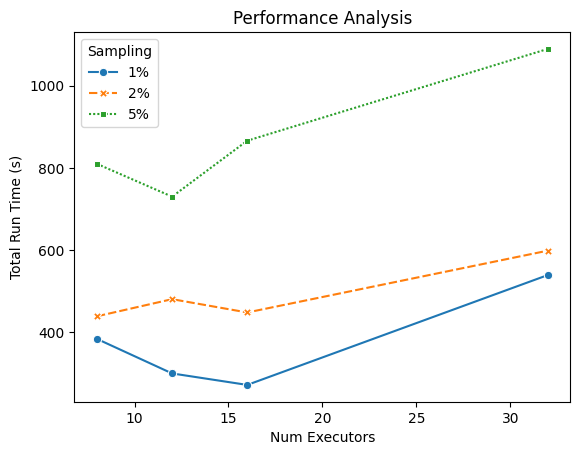

In [101]:
ax = sns.lineplot(
    data = dff,
    x = 'Num Executors',
    y = 'TIME_Final Time',
    markers=True,
    hue='Sampling',
    style='Sampling'
)
ax.set_ylabel('Total Run Time (s)')
ax.set_xlabel('Num Executors')
ax.set_title("Performance Analysis")

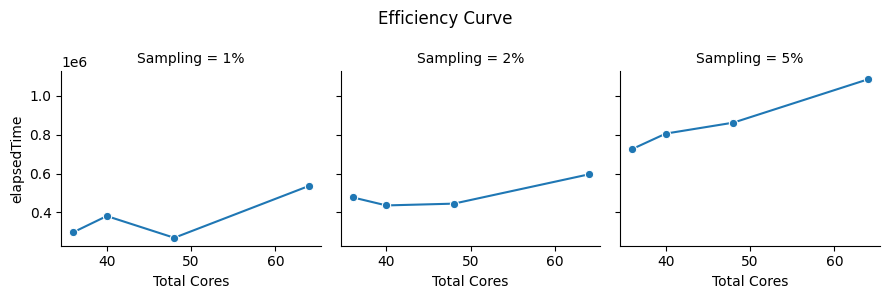

In [102]:

g = sns.FacetGrid(dff, col="Sampling")
g.map_dataframe(sns.lineplot, "Total Cores", "elapsedTime",
                style='Sampling', markers=True)
#g.add_legend()
g.fig.suptitle("Efficiency Curve", fontsize=12)
g.tight_layout()

In [50]:
dff.columns

Index(['Unnamed: 0', 'index', 'numStages', 'numTasks', 'elapsedTime',
       'stageDuration', 'executorRunTime', 'executorCpuTime',
       'executorDeserializeTime', 'executorDeserializeCpuTime',
       'resultSerializationTime', 'jvmGCTime', 'shuffleFetchWaitTime',
       'shuffleWriteTime', 'resultSize', 'diskBytesSpilled',
       'memoryBytesSpilled', 'peakExecutionMemory', 'recordsRead', 'bytesRead',
       'recordsWritten', 'bytesWritten', 'shuffleRecordsRead',
       'shuffleTotalBlocksFetched', 'shuffleLocalBlocksFetched',
       'shuffleRemoteBlocksFetched', 'shuffleTotalBytesRead',
       'shuffleLocalBytesRead', 'shuffleRemoteBytesRead',
       'shuffleRemoteBytesReadToDisk', 'shuffleBytesWritten',
       'shuffleRecordsWritten', 'name_file_csv', 'Num Executors', 'Num Cores',
       'Executor Memory', 'Driver Memory', 'Percentage', 'Val Accuracy',
       'Test Accuracy', 'TIME_Feature Engineering', 'TIME_Count Rows',
       'TIME_Pipeline Fit', 'TIME_Validation', 'TIME_Test',

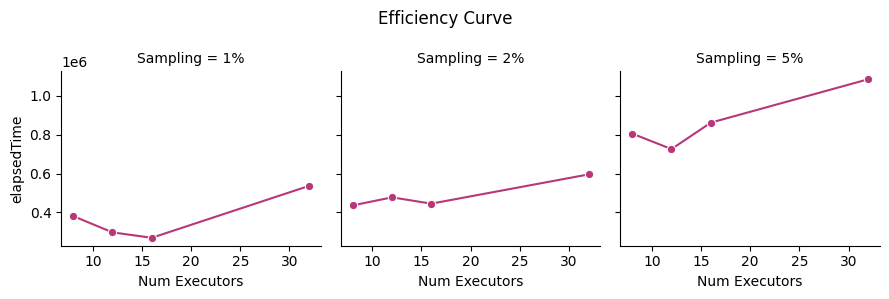

In [103]:
g = sns.FacetGrid(dff, col="Sampling")
g.map_dataframe(sns.lineplot, "Num Executors", "elapsedTime",
                style='Sampling',
                markers=True,
                hue='Sampling',
                palette='magma')
#g.add_legend()
g.fig.suptitle("Efficiency Curve", fontsize=12)
g.tight_layout()

<Axes: xlabel='Num Executors', ylabel='Percentage'>

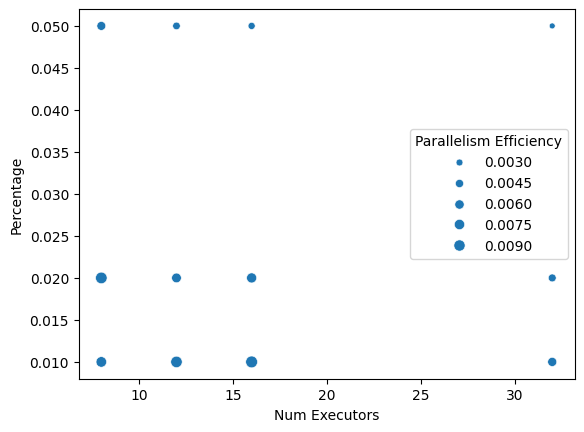

In [104]:
sns.scatterplot(dff,
                x='Num Executors',
                y='Percentage',
                size='Parallelism Efficiency')

Text(0.5, 1.0, 'Run Time')

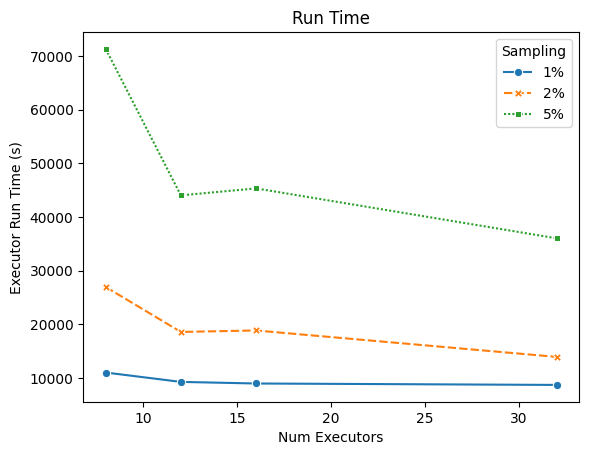

In [85]:
d = sns.lineplot(dff,
             x='Num Executors',
             y=dff['executorRunTime']/1000,
             hue='Sampling',
             markers=True,
             style='Sampling')
d.set_ylabel('Executor Run Time (s)')
d.set_title('Run Time')

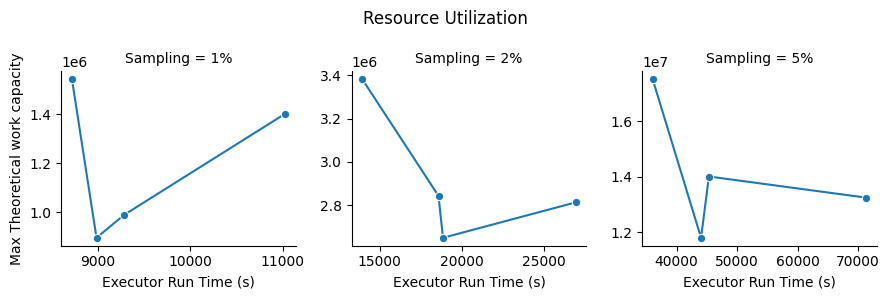

In [108]:

g = sns.FacetGrid(dff, col="Sampling", sharey=False,sharex=False)
#g.add_legend()
g.fig.suptitle("Resource Utilization", fontsize=12)
g.map_dataframe(sns.lineplot,
             x='Executor Run Time (s)',
             y='Num Tasks * Elapsed Time',
             hue='Sampling',
             markers=True,
             style='Sampling')
g.set_ylabels('Max Theoretical work capacity')
g.tight_layout()

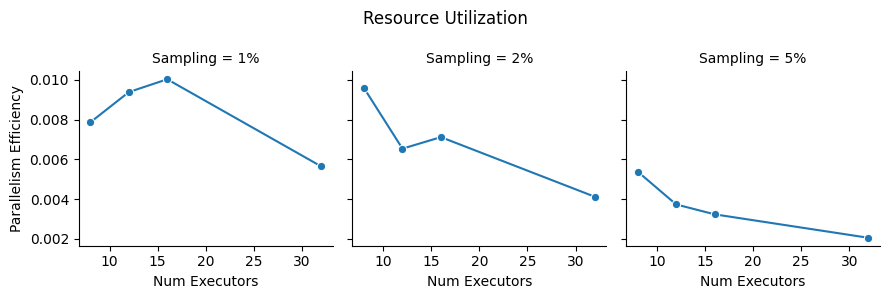

In [110]:
g = sns.FacetGrid(dff, col="Sampling")
#g.add_legend()
g.fig.suptitle("Resource Utilization", fontsize=12)
g.map_dataframe(sns.lineplot,
             x='Num Executors',
             y='Parallelism Efficiency',
             hue='Sampling',
             markers=True,
             style='Sampling')
g.tight_layout()

In [109]:
dff[['numTasks','elapsedTime','executorRunTime']]

,numTasks,elapsedTime,executorRunTime
0,3335,296643,9282026
1,3335,268609,8983813
2,2877,536296,8718133
3,3684,380723,11026042
4,5959,477071,18588378
5,5959,444616,18862433
6,5679,595424,13937840
7,6460,435456,26961902
8,16244,725884,44033008
9,16244,862112,45329145


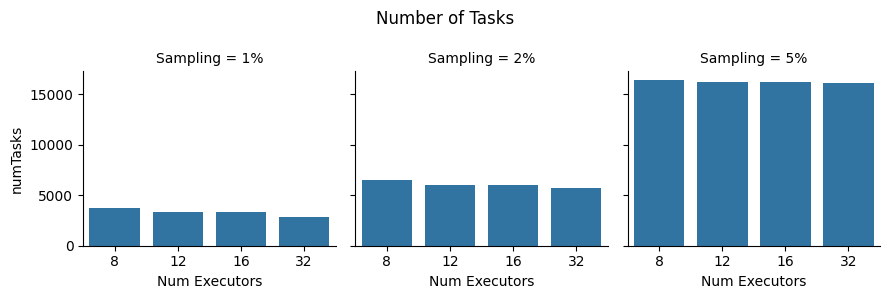

In [115]:
g = sns.FacetGrid(dff, col="Sampling")
#g.add_legend()
g.fig.suptitle("Number of Tasks", fontsize=12)
g.map_dataframe(sns.barplot,
             x='Num Executors',
             y='numTasks')
g.tight_layout()

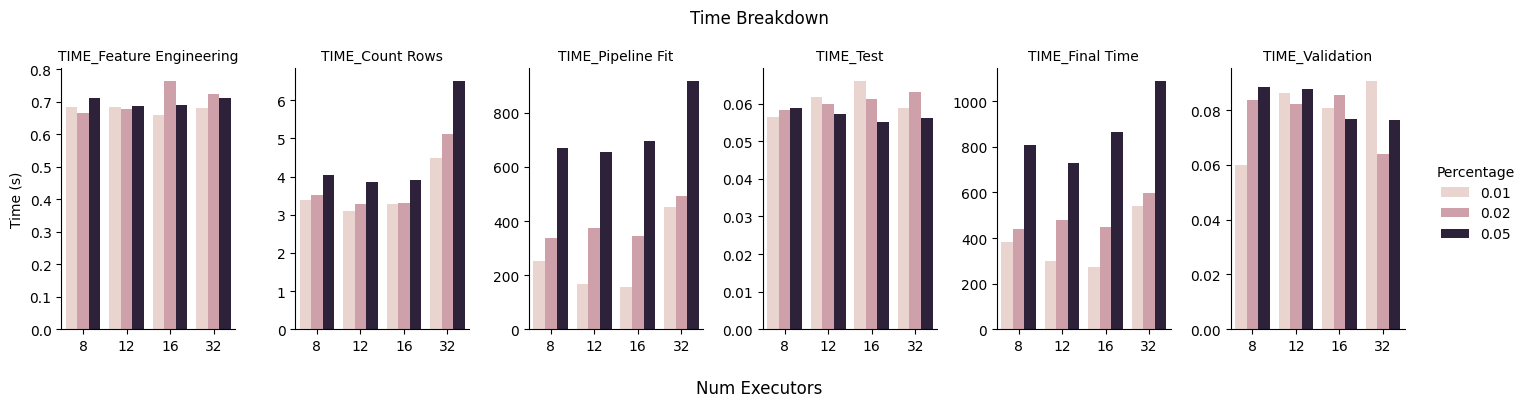

In [126]:
cols_name = ['name_file_csv',
       'Num Executors', 'Num Cores',
       'Percentage', 'Val Accuracy', 'Test Accuracy',
       'TIME_Feature Engineering', 'TIME_Count Rows', 'TIME_Pipeline Fit',
       'TIME_Validation', 'TIME_Test', 'TIME_Final Time']

dff_melted = dff[cols_name].melt(id_vars=['name_file_csv',
                            'Num Executors', 'Num Cores',
                            'Percentage', 'Val Accuracy', 'Test Accuracy'],
                    var_name='Time')

g = sns.catplot(
    data=dff_melted.sort_values(by='Num Executors'),
    x="Num Executors", y="value",hue='Percentage',
    col="Time",
    row=3,
    kind="bar",
    height=4,
    aspect=.6,
    sharey=False
)
g.set_axis_labels("", "Time (s)")
# Remove individual axis labels
g.set_xlabels("")   # or None
# Add one global xlabel
g.fig.supxlabel("Num Executors")
g.set_titles("{col_name}")
g.fig.suptitle("Time Breakdown", fontsize=12)
g.tight_layout()

In [116]:
dff.columns

Index(['Unnamed: 0', 'index', 'numStages', 'numTasks', 'elapsedTime',
       'stageDuration', 'executorRunTime', 'executorCpuTime',
       'executorDeserializeTime', 'executorDeserializeCpuTime',
       'resultSerializationTime', 'jvmGCTime', 'shuffleFetchWaitTime',
       'shuffleWriteTime', 'resultSize', 'diskBytesSpilled',
       'memoryBytesSpilled', 'peakExecutionMemory', 'recordsRead', 'bytesRead',
       'recordsWritten', 'bytesWritten', 'shuffleRecordsRead',
       'shuffleTotalBlocksFetched', 'shuffleLocalBlocksFetched',
       'shuffleRemoteBlocksFetched', 'shuffleTotalBytesRead',
       'shuffleLocalBytesRead', 'shuffleRemoteBytesRead',
       'shuffleRemoteBytesReadToDisk', 'shuffleBytesWritten',
       'shuffleRecordsWritten', 'name_file_csv', 'Num Executors', 'Num Cores',
       'Executor Memory', 'Driver Memory', 'Percentage', 'Val Accuracy',
       'Test Accuracy', 'TIME_Feature Engineering', 'TIME_Count Rows',
       'TIME_Pipeline Fit', 'TIME_Validation', 'TIME_Test',